## Download datasets


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-09-18 06:30:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.006s  

2024-09-18 06:30:44 (30.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col='Date')
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


## data viz


In [ ]:
(df.info(), len(df))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


(None, 2787)

In [ ]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns = {'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


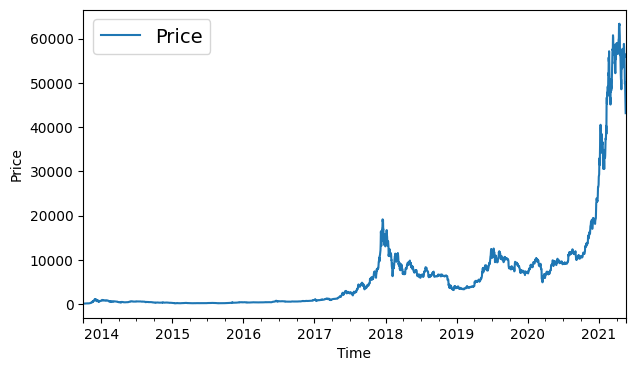

In [ ]:
bitcoin_prices.plot(figsize=(7,4))
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(fontsize = 14)
plt.show()

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

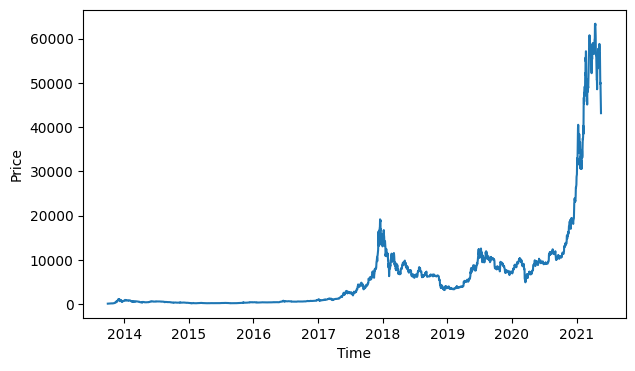

In [ ]:
import numpy as np

plt.figure(figsize=(7,4))
plt.plot(timesteps, btc_price)
plt.ylabel('Price')
plt.xlabel('Time')
plt.show()

In [ ]:
time = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

split_size = int(0.8 * len(prices))
xtrain, ytrain = timesteps[:split_size], prices[:split_size]
xtest, ytest = timesteps[split_size:], prices[split_size:]

(len(xtrain), len(ytrain), len(xtest), len(ytest))

(2229, 2229, 558, 558)

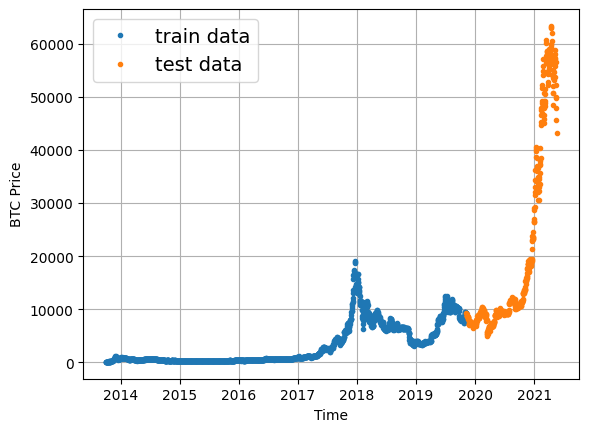

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

plot_time_series(xtrain, ytrain, label='train data')
plot_time_series(xtest, ytest, label='test data')

## model 0 | naive forecast
- naive forecast is nothing but slicing ytest to -1  

In [ ]:
naive_forecast = ytest[:-1]
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

### plot naive forecast

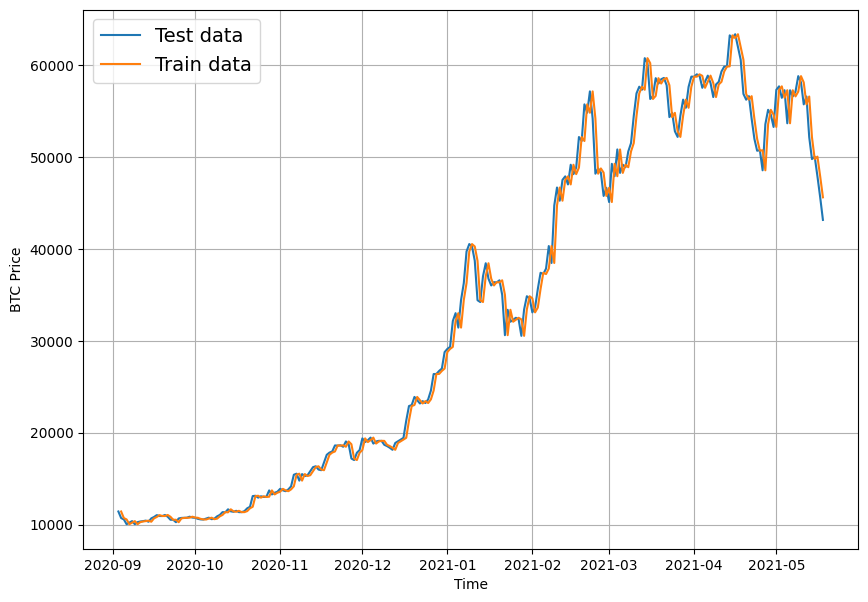

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(xtrain, ytrain, label="Train data")
plot_time_series(xtest, ytest, label="Test data", start = 300, format = '-')
plot_time_series(xtest[1:], naive_forecast, label="Train data", format="-", start = 300)

### fn: `mean absolute scaled error`

In [ ]:
def scaled(ytrue, ypred):

    # making sure that the datatype is consistent
    ytrue = tf.convert_to_tensor(ytrue, dtype=tf.float32)
    ypred = tf.convert_to_tensor(ypred, dtype=tf.float32)

    mae1 = tf.reduce_mean(tf.abs(ytrue - ypred))
    mae2 = tf.reduce_mean(tf.abs(ytrue[1:] - ytrue[:-1])) # naive model

    return mae1 / mae2

### fn: `evaluating metrics`



In [ ]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    rmse = tf.sqrt(mse)
    mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100
    mase = scaled(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy(),
    }


In [ ]:
results0 = evaluate_preds(ytest[1:] ,naive_forecast)

## Windowing dataset
- we use windows to convert our time series model to supervised learning datasets
- [1,2,3,4,5] = [6]
- [2,3,4,5,6] = [7] ...

In [ ]:
HORIZON = 1
WINDOW = 7

def windowing(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

In [ ]:
window, label = windowing(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f'Example:\nWindow: {tf.squeeze(window)} -> label: {tf.squeeze(label)}')

Example:
Window: [1 2 3 4 5 6 7] -> label: 8


In [ ]:
def make_windows(x, window_size=7, horizon=1):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  windowed_array = x[window_indexes]
  windows, labels = windowing(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


## Splitting of Features and labels

In [ ]:
def train_test_split(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

## Model 1 | Dense ANN

In [ ]:
def create_model_checkpoint(model_name, save_path="model_experiments"):

    if not os.path.exists(save_path):
        os.makedirs(save_path)

    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name+".keras"),
        verbose=1,
        monitor='val_loss',
        save_best_only=True
    )

In [ ]:
tf.random.set_seed(10)

model1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear = none, like linear will laugh it off
], name = 'model1')

model1.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

es = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)

history1 = model1.fit(
    train_windows,
    train_labels,
    batch_size = 128,
    epochs = 100,
    verbose = 1,
    validation_data = (test_windows, test_labels),
    callbacks = [create_model_checkpoint(model1.name+".keras")]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1449.2235 - mae: 1449.2235
Epoch 1: val_loss improved from inf to 2256.98853, saving model to model_experiments/model1.keras.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 1419.0408 - mae: 1419.0408 - val_loss: 2256.9885 - val_mae: 2256.9885
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 403.3599 - mae: 403.3599
Epoch 2: val_loss improved from 2256.98853 to 1130.12634, saving model to model_experiments/model1.keras.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 286.6566 - mae: 286.6566 - val_loss: 1130.1263 - val_mae: 1130.1263
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 199.4420 - mae: 199.4420
Epoch 3: val_loss improved from 1130.12634 to 972.14453, saving model to model_experiments/model1.keras.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 206.0481 - mae: 206.0481 - val_loss: 972.1445 - val_mae: 972.1445
Epoch 4/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 171.4903 - m

In [ ]:
model1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 289.7869 - mae: 289.7869


[576.4785766601562, 576.4785766601562]

### fn: `predictor`

In [ ]:
def predictor(model, input_data):

    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [ ]:
preds1 = predictor(model1, test_windows)
results1 = evaluate_preds(tf.squeeze(test_labels), preds1)
results1

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


{'mae': 576.47864,
 'mse': 1181204.0,
 'rmse': 1086.832,
 'mape': 2.596813,
 'mase': 1.0127133}

In [ ]:
print(f"Shape of test_labels: {test_labels.shape}")
print(f"Shape of preds1: {preds1.shape}")

Shape of test_labels: (556, 1)
Shape of preds1: (556,)


In [ ]:
results0

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Predictions Viz

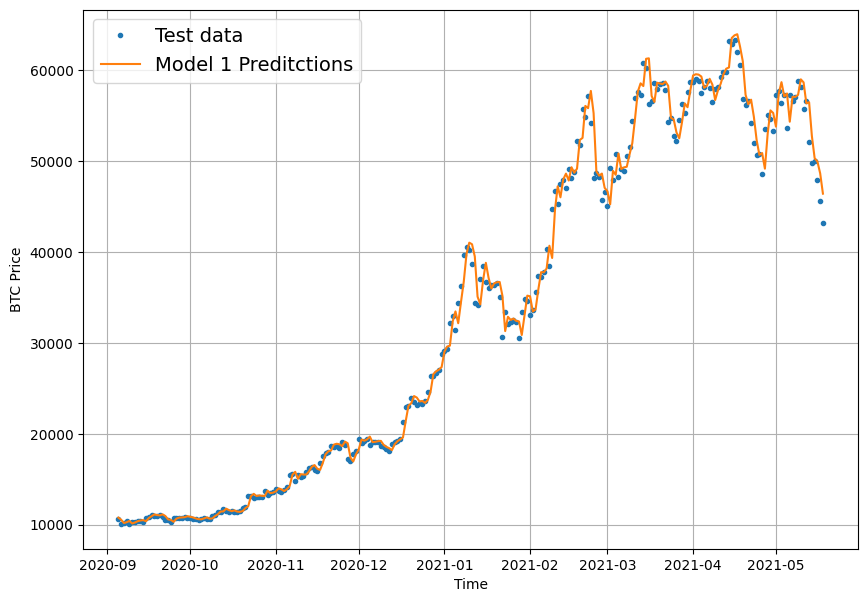

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=xtest[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test data")
plot_time_series(timesteps=xtest[-len(test_windows):], values=preds1, start=offset, format="-", label="Model 1 Preditctions")

## Model 2 | Conv1D Model
- windowing
- split to train/test sets

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=7,horizon=1)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

- conv1d's input shape looks like this: `(batch_size, timestamps, input_dim)`
- but our data doesnt look like this YET
- so reshaping the data is a MUST
- batch_size is optional so we ignore it
- so just convert dimension (x,) -> (x, 1)

In [ ]:
x = tf.constant(train_windows[0])
expand_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))
print(x.shape)
print(expand_layer(x).shape)

(7,)
(7, 1)


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model2 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, strides=1, padding='causal', activation='relu', name='conv1d_layer'),
    layers.Dense(1, name='output_layer')
], name="model2")

model2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)


history2 = model2.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=100,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model2.name)]
)



Epoch 1: val_loss improved from inf to 4636.86621, saving model to model_experiments/model2.keras

Epoch 2: val_loss improved from 4636.86621 to 1194.12915, saving model to model_experiments/model2.keras

Epoch 3: val_loss improved from 1194.12915 to 1085.36548, saving model to model_experiments/model2.keras

Epoch 4: val_loss improved from 1085.36548 to 1064.39380, saving model to model_experiments/model2.keras

Epoch 5: val_loss did not improve from 1064.39380

Epoch 6: val_loss did not improve from 1064.39380

Epoch 7: val_loss improved from 1064.39380 to 1039.10034, saving model to model_experiments/model2.keras

Epoch 8: val_loss improved from 1039.10034 to 1003.35590, saving model to model_experiments/model2.keras

Epoch 9: val_loss improved from 1003.35590 to 984.46796, saving model to model_experiments/model2.keras

Epoch 10: val_loss improved from 984.46796 to 973.94324, saving model to model_experiments/model2.keras

Epoch 11: val_loss improved from 973.94324 to 963.72638, s

In [ ]:
model2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 292.1502 - mae: 292.1502


[578.5465087890625, 578.5465087890625]

In [ ]:
model2.summary()

Model: "model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_layer (Conv1D)                │ (None, 1, 128)              │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,589 (76.52 KB)

 Trainable params: 6,529 (25.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,060 (51.02 KB)

In [ ]:
preds2 = predictor(model2, test_windows)
results2 = evaluate_preds(tf.squeeze(test_labels), preds2)
results2

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


{'mae': 578.5465,
 'mse': 1191960.6,
 'rmse': 1091.7695,
 'mape': 2.6036901,
 'mase': 1.016346}

## Model 3 | LSTM

In [ ]:
tf.random.set_seed(10)

inputs = layers.Input(shape=(7,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation='relu')(x)
output = layers.Dense(1)(x)

model3 = tf.keras.Model(inputs, output, name='model3')

model3.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam()
)

history3 = model3.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=100,
    verbose=1,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model3.name)]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2067.7878
Epoch 1: val_loss improved from inf to 4197.45801, saving model to model_experiments/model3.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 2043.2355 - val_loss: 4197.4580
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 713.9314
Epoch 2: val_loss improved from 4197.45801 to 1109.47974, saving model to model_experiments/model3.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 411.2506 - val_loss: 1109.4797
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 204.8473
Epoch 3: val_loss improved from 1109.47974 to 965.96674, saving model to model_experiments/model3.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 185.6481 - val_loss: 965.9667
Epoch 4/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 167.5857
Epoch 4: val_loss did not improve from 965.96674
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 173.5558 - val_loss: 1026.3350
Epoch 5/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - 

In [ ]:
model3.summary()

Model: "model3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,285 (817.52 KB)

 Trainable params: 69,761 (272.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 139,524 (545.02 KB)

In [ ]:
model3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 293.6826


581.03515625

In [ ]:
preds3 = predictor(model3, test_windows)
results3 = evaluate_preds(tf.squeeze(test_labels), preds3)
results3

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


{'mae': 581.03516,
 'mse': 1218118.8,
 'rmse': 1103.6842,
 'mape': 2.6179974,
 'mase': 1.0207179}

## Model 4 | Adding Features

### Creating Timestamps of Bitcoin Halving

In [ ]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

### calc total no. of days

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
(block_reward_2_days, block_reward_3_days)

(1012, 2414)

### adding `block_reward` to the df

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


### plotting the `multivariate` dataset

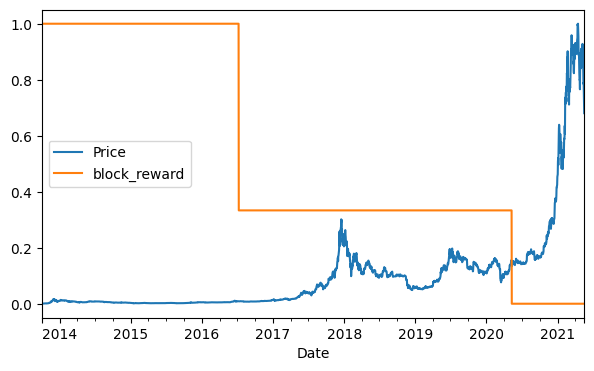

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block          [["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(7, 4));

### windowing again

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


### removing NaN rows

In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


### data splitting

In [ ]:
split_size = int(len(X) * 0.8)

xtrain, ytrain = X[:split_size], y[:split_size]
xtest, ytest = X[split_size:], y[split_size:]

len(xtrain), len(ytrain), len(xtest), len(ytest)

(2224, 2224, 556, 556)

In [ ]:
model4 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON),
], name='model4')

model4.compile(loss='mae',
               optimizer = tf.keras.optimizers.Adam())

history4 = model4.fit(
    xtrain,
    ytrain,
    epochs = 100,
    batch_size = 128,
    validation_data = (xtest, ytest),
    callbacks = [create_model_checkpoint(model4.name)]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2891.2961  
Epoch 1: val_loss improved from inf to 2024.83569, saving model to model_experiments/model4.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 2838.6321 - val_loss: 2024.8357
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - loss: 362.8552
Epoch 2: val_loss did not improve from 2024.83569
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 477.2686 - val_loss: 2244.4365
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 367.9122
Epoch 3: val_loss improved from 2024.83569 to 1214.12927, saving model to model_experiments/model4.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 286.7657 - val_loss: 1214.1293
Epoch 4/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 174.5196
Epoch 4: val_loss improved from 1214.12927 to 1057.42542, saving model to model_experiments/model4.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 190.1964 - val_loss: 1057.4254
Epoch 5/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/s

In [ ]:
model4.evaluate(xtest, ytest)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 294.4157


582.8739013671875

In [ ]:
model4 = tf.keras.models.load_model("/content/model_experiments/model4.keras")
model4.evaluate(xtest, ytest)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 283.6781


567.6880493164062

In [ ]:
preds4 = tf.squeeze(model4.predict(xtest))
results4 = evaluate_preds(tf.squeeze(ytest), preds4)
results4

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


{'mae': 567.68805,
 'mse': 1166039.0,
 'rmse': 1079.8329,
 'mape': 2.5346854,
 'mase': 0.99727064}

In [ ]:
results0

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 5 | N-Beats Algorithm
- The `N-BEATS` algorithm `(Neural Basis Expansion Analysis Time Series)` is a deep learning architecture designed for time series forecasting. It was introduced as a model that does not rely on specific domain knowledge.

### creating the layer

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
print(f"Dummy Inputs: {dummy_inputs}")

# pass the inputs to the custom layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Dummy Inputs: [[1 2 3 4 5 6 7]]
Backcast: [-0.34075928 -0.21449883  0.19535527 -0.5911453   0.28752238 -0.017088
 -0.06603485]
Forecast: -0.030667901039123535


### Preparing the data for NBeats

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

### Windowing

In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


### Data splitting

In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]


split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

### Data Preprocessing -> Tensor Datasets

In [ ]:
# Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Defining Constants

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Creating the double residual Stacking Architecture

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
tf.keras.backend.clear_session()

### Model Building

In [ ]:
 %%time

tf.random.set_seed(10)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)):

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

model5 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

model5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae"])

model5.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 398: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 498: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 19s, sys: 2.82 s, total: 2min 22s
Wall time: 2min 49s


### Model Evaluation & Predictions

In [ ]:
model5.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 579.5964 - mae: 579.5964


[579.596435546875, 579.596435546875]

In [ ]:
preds5 = predictor(model5, test_dataset)
results5 = evaluate_preds(y_true=y_test,
                                 y_pred=preds5)
results5

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


{'mae': 579.5965,
 'mse': 1158627.9,
 'rmse': 1076.3958,
 'mape': 2.6481228,
 'mase': 1.0181905}

In [ ]:
results4

{'mae': 567.68805,
 'mse': 1166039.0,
 'rmse': 1079.8329,
 'mape': 2.5346854,
 'mase': 0.99727064}

In [ ]:
results0

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

- mother fucking Insolent pest

## Model 6 | Ensemble Model

### create the layer

In [ ]:
def get_ensemble_model(horizon = HORIZON,
                       train_data = train_dataset,
                       test_data = test_dataset,
                       num_iter = 10,
                       num_epochs = 1000,
                       loss_fn = ['mae', 'mape']):

    ensemble_models = []

    for i in range(num_iter):
        for loss_function in loss_fn:
            print(f"Optimizing model by reducing: {loss_function}, for Epochs: {num_epochs}, Model Number: {i}")

            model = tf.keras.Sequential([
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(HORIZON)
            ])

            model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

            model.fit(train_data,
                        epochs=num_epochs,
                        verbose=0,
                        validation_data=test_data,

                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                    patience=200,
                                                                    restore_best_weights=True),
                                tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                        patience=100,
                                                                        verbose=1)])

            ensemble_models.append(model)

        return ensemble_models

### activate the layer

In [ ]:
ensemble_models = get_ensemble_model(num_iter=5, num_epochs=1000)

Optimizing model by reducing: mae, for Epochs: 1000, Model Number: 0

Epoch 321: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 660: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 760: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape, for Epochs: 1000, Model Number: 0

Epoch 244: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 344: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


### make predictions

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


<tf.Tensor: shape=(2, 556), dtype=float32, numpy=
array([[ 8807.9795,  8759.779 ,  9099.954 , ..., 49983.445 , 48300.797 ,
        46835.6   ],
       [ 8787.534 ,  8776.457 ,  9094.56  , ..., 49739.438 , 48641.293 ,
        46354.895 ]], dtype=float32)>

In [ ]:
results6 = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))
results6

{'mae': 577.33563,
 'mse': 1166218.8,
 'rmse': 1079.916,
 'mape': 2.600594,
 'mase': 1.0142188}

In [ ]:
results0

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Uncertainities
- `step1`: make the predictions from `ensemble models`
- `step2`: calculate the `standard deviation` of the preds
- `step3`: multiply the std dev by 1.96 as the `95% confidence intervals always falls between -1.96 and 1.96 in a Gaussian Distribution`
- `step4`: to get the `upper and lower bounds` of the intervals add and subtract the values from step3,
to the mean/median obtained from step1

In [ ]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

lower, upper = get_upper_lower(preds=ensemble_preds)

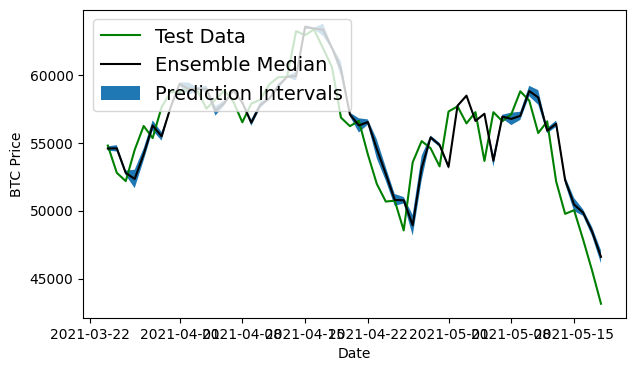

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

offset=500
plt.figure(figsize=(7, 4))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

## Model 7 | Forecasting the Future

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
'''
here we are going to use all the data for forecasting,
as there exists no train or test datasets for forecasting
'''

'\nhere we are going to use all the data for forecasting,\nas there exists no train or test datasets for forecasting\n'

- step1: turn all the tensors to tensor datasets
- step2: combine all features and labels using .Zip()
- step3: batch and prefetch

### Combining the dataset

In [ ]:
# 1
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(10)

model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

# no model checkpoint because, no validation dataset to save 🙆‍♂️

### making predictions


- takes input
- create an empty list for forecasting
- loop INTO_FUTURE into making predictions

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:

    future_forecast = []
    last_window = values[-WINDOW_SIZE:]

    for _ in range(into_future):

        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

        future_forecast.append(tf.squeeze(future_pred).numpy())
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

    return future_forecast

INTO_FUTURE = 14
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55012.18359375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55012.18359375] -> Prediction: 49292.7265625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55012.18359375 49292.7265625 ] -> Prediction: 49486.90234375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55012.18359375 49292.7265625  49486.90234375] -> Prediction: 49077.75390625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55012.18359375
 49292.7265625  49486.90234375 49077.75390625] -> Prediction: 46617.28515625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16

### Plotting the Forecast

In [ ]:
def get_future_dates(start_date, into_future, offset=1):

    start_date = start_date + np.timedelta64(offset, "D")
    end_date = start_date + np.timedelta64(into_future, "D")
    return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
# get the next 2 weeks of timestamps

last_timestep = bitcoin_prices.index[-1]
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

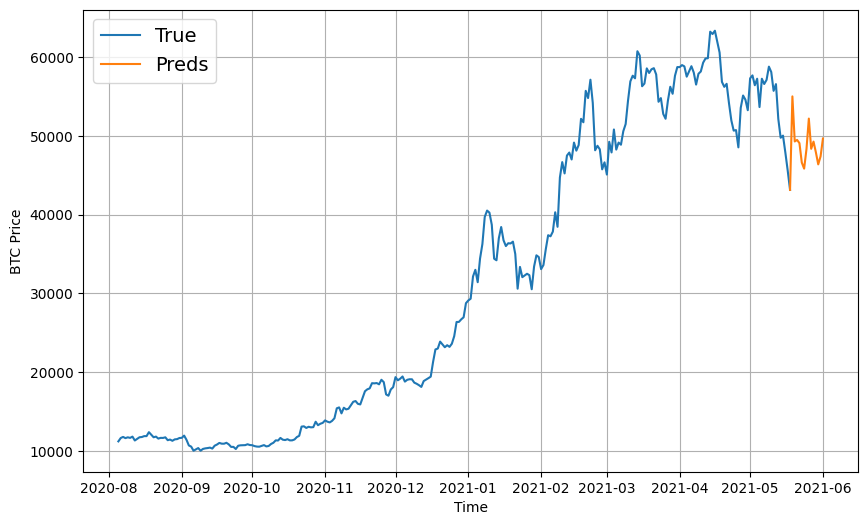

In [ ]:
# list of dates to predict are ready, now plotting shit

next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

plt.figure(figsize=(10, 6))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="True")
plot_time_series(next_time_steps, future_forecast, format="-", label="Preds")

## Model 8 | Turkey Model
- observational data cannot predict catastrophic events

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

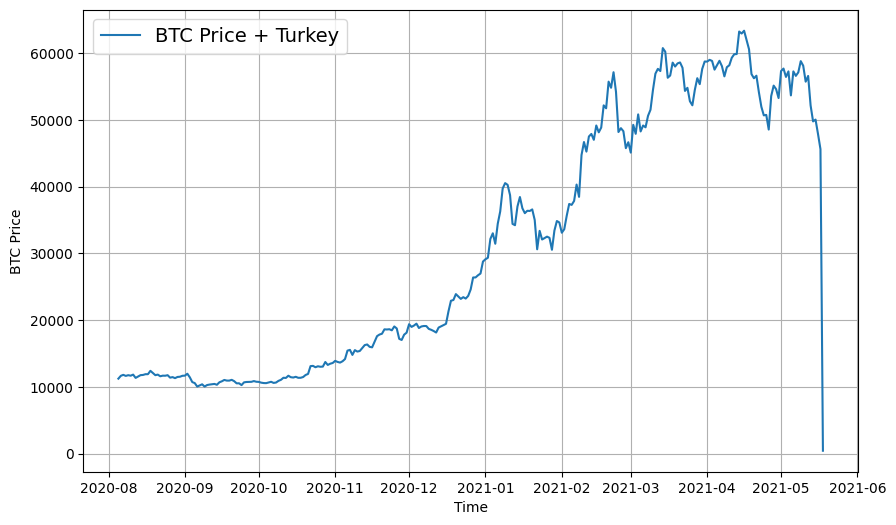

In [ ]:
plt.figure(figsize=(10, 6))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey",
                 start=2500)

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = train_test_split(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
turkey_model = tf.keras.models.clone_model(model1)
turkey_model._name = "Turkey_Model"

turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])


Epoch 1: val_loss improved from inf to 1079.36780, saving model to model_experiments/model1.keras

Epoch 2: val_loss improved from 1079.36780 to 932.33868, saving model to model_experiments/model1.keras

Epoch 3: val_loss improved from 932.33868 to 856.39557, saving model to model_experiments/model1.keras

Epoch 4: val_loss improved from 856.39557 to 784.80365, saving model to model_experiments/model1.keras

Epoch 5: val_loss improved from 784.80365 to 776.97192, saving model to model_experiments/model1.keras

Epoch 6: val_loss did not improve from 776.97192

Epoch 7: val_loss did not improve from 776.97192

Epoch 8: val_loss did not improve from 776.97192

Epoch 9: val_loss improved from 776.97192 to 736.00439, saving model to model_experiments/model1.keras

Epoch 10: val_loss improved from 736.00439 to 700.93298, saving model to model_experiments/model1.keras

Epoch 11: val_loss did not improve from 700.93298

Epoch 12: val_loss did not improve from 700.93298

Epoch 13: val_loss did

In [ ]:
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 297.0758 


650.8073120117188

In [ ]:
turkey_model = tf.keras.models.load_model("/content/model_experiments/model1.keras.keras")
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 291.6119 - mae: 291.6119


[645.425537109375, 645.425537109375]

In [ ]:
turkey_preds = predictor(turkey_model, X_test)
turkey_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8832.933, 8768.543, 9026.498, 8797.552, 8722.499, 8713.873,
       8674.642, 8520.952, 8433.286, 8518.108], dtype=float32)>

In [ ]:
results8 = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
results8

{'mae': 17149.117,
 'mse': 615804400.0,
 'rmse': 24815.406,
 'mape': 121.61607,
 'mase': 26.538315}

In [ ]:
results1

{'mae': 576.47864,
 'mse': 1181204.0,
 'rmse': 1086.832,
 'mape': 2.596813,
 'mase': 1.0127133}

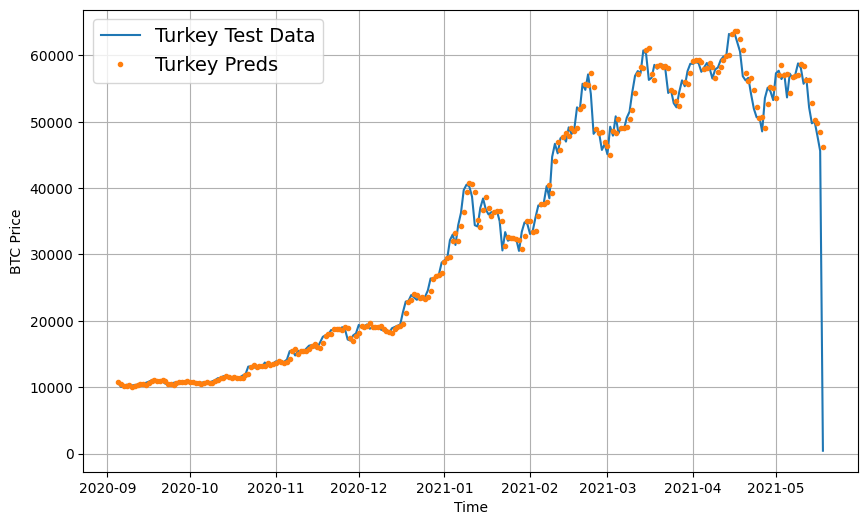

In [ ]:
plt.figure(figsize=(10, 6))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

In [ ]:
model_results = pd.DataFrame({"naive_model": results0,
                              "Dense": results1,
                              "CONV1D": results2,
                              "LSTM": results3,
                              "Multivariate": results4,
                              "NBEATs": results5,
                              "EMSEMBLE": results6,
                              "TURKEY": results8}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
Dense,576.478638,1.181204e+06,1086.832031,2.596813,1.012713
CONV1D,578.546509,1.191961e+06,1091.769531,2.603690,1.016346
LSTM,581.035156,1.218119e+06,1103.684204,2.617997,1.020718
Multivariate,567.688049,1.166039e+06,1079.832886,2.534685,0.997271
NBEATs,579.596497,1.158628e+06,1076.395752,2.648123,1.018191
EMSEMBLE,577.335632,1.166219e+06,1079.916016,2.600594,1.014219
TURKEY,17149.117188,6.158044e+08,24815.406250,121.616074,26.538315


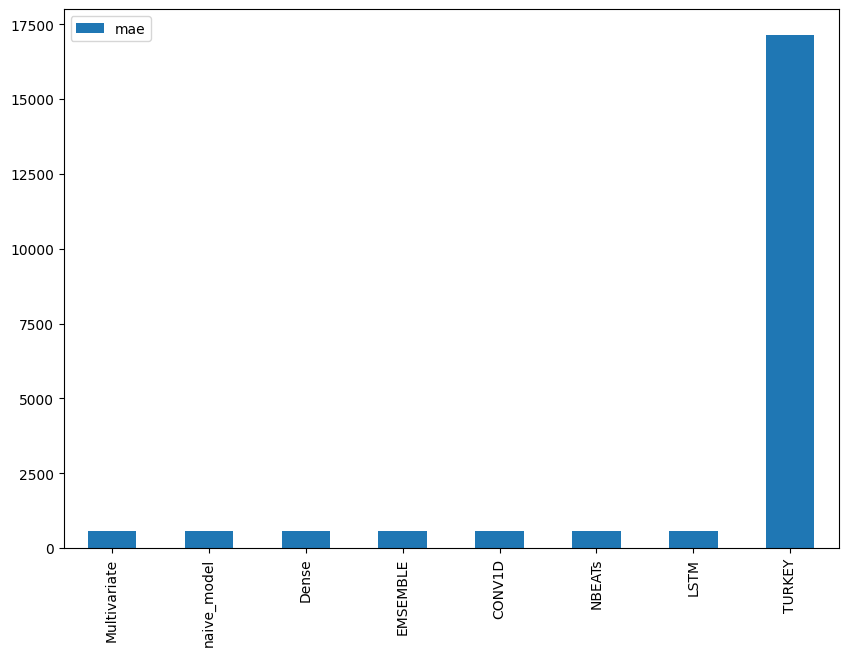

In [ ]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");